In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.__version__

'0.0.26'

In [3]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [4]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [5]:
# Read in B cell data
%time bdata = sc.read_h5ad('h5ad/combined_dec_bcells.h5ad')
# subset to only D0 
bdata = bdata[(bdata.obs['Collection_Day'] == 'D0')& (bdata.obs['bcr_QC_pass'] == 'True')].copy()
bdata

CPU times: user 6.26 s, sys: 439 ms, total: 6.7 s
Wall time: 6.69 s


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


AnnData object with n_obs × n_vars = 43841 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [6]:
# subset to each severity  classification
from collections import defaultdict
adata = defaultdict(dict)
vdj = defaultdict(dict)

In [7]:
# subset each status and place it in adata
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Non_covid', 'LPS']:
    adata[x] = bdata[bdata.obs['Status_on_day_collection_summary'] == x].copy()

In [8]:
vdj_files = {"Critical":'dandelion_output/combined_dec_bcell_vdj_critical.h5',
             "Severe":'dandelion_output/combined_dec_bcell_vdj_severe.h5',
             "Moderate":'dandelion_output/combined_dec_bcell_vdj_moderate.h5',
             "Mild":'dandelion_output/combined_dec_bcell_vdj_mild.h5',
             "LPS":'dandelion_output/combined_dec_bcell_vdj_lps.h5',
             "Non_covid":'dandelion_output/combined_dec_bcell_vdj_non_covid.h5',
             "Asymptomatic":'dandelion_output/combined_dec_bcell_vdj_asymptomatic.h5',
             "Healthy":'dandelion_output/combined_dec_bcell_vdj_healthy.h5',
             "Malignant":'dandelion_output/combined_dec_bcell_vdj_malignant.h5'}

In [9]:
# also read in the vdj objects
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Non_covid', 'LPS', 'Malignant']:
    vdj[x] = ddl.read_h5(vdj_files[x])

In [10]:
data = pd.DataFrame()
for x in vdj:
    data = data.append(vdj[x].metadata)

In [11]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [12]:
from dandelion.tools import extract_edge_weights
#  isotype_df = defaultdict(dict)

In [32]:
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    ddl.tl.transfer(adata[x], vdj[x], expanded_only = True)

converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots


In [73]:
col_dict = {'':'#FFFFFF',
'IGHM':'#264653',
'IGHD':'#2A9D8F',
'IGHA1':'#F1CE63',
'IGHA2':'#F28E2B',
'IGHE':'#000000',
'IGHG1':'#fee5d9',
'IGHG2':'#fcae91',
'IGHG3':'#fb6a4a',
'IGHG4':'#cb181d',
'IGHA1,IGHA2':'#ffffff',
'IGHG1,IGHG2':'#ffffff',
'IGHG2,IGHG3':'#ffffff',
'IGHG1,IGHG3':'#ffffff',
'IGHG1,IGHG3,IGHG4':'#ffffff',
'IGHG1,IGHG2,IGHG3':'#ffffff',
'IGHG1,IGHG2,IGHG4':'#ffffff',
'IGHG3,IGHG2,IGHG4':'#ffffff',
'IGHG2,IGHG4':'#ffffff',
'IGHG3,IGHG4':'#ffffff',
}

In [107]:
if not os.path.exists('figures/bcr'):
    os.makedirs('figures/bcr')

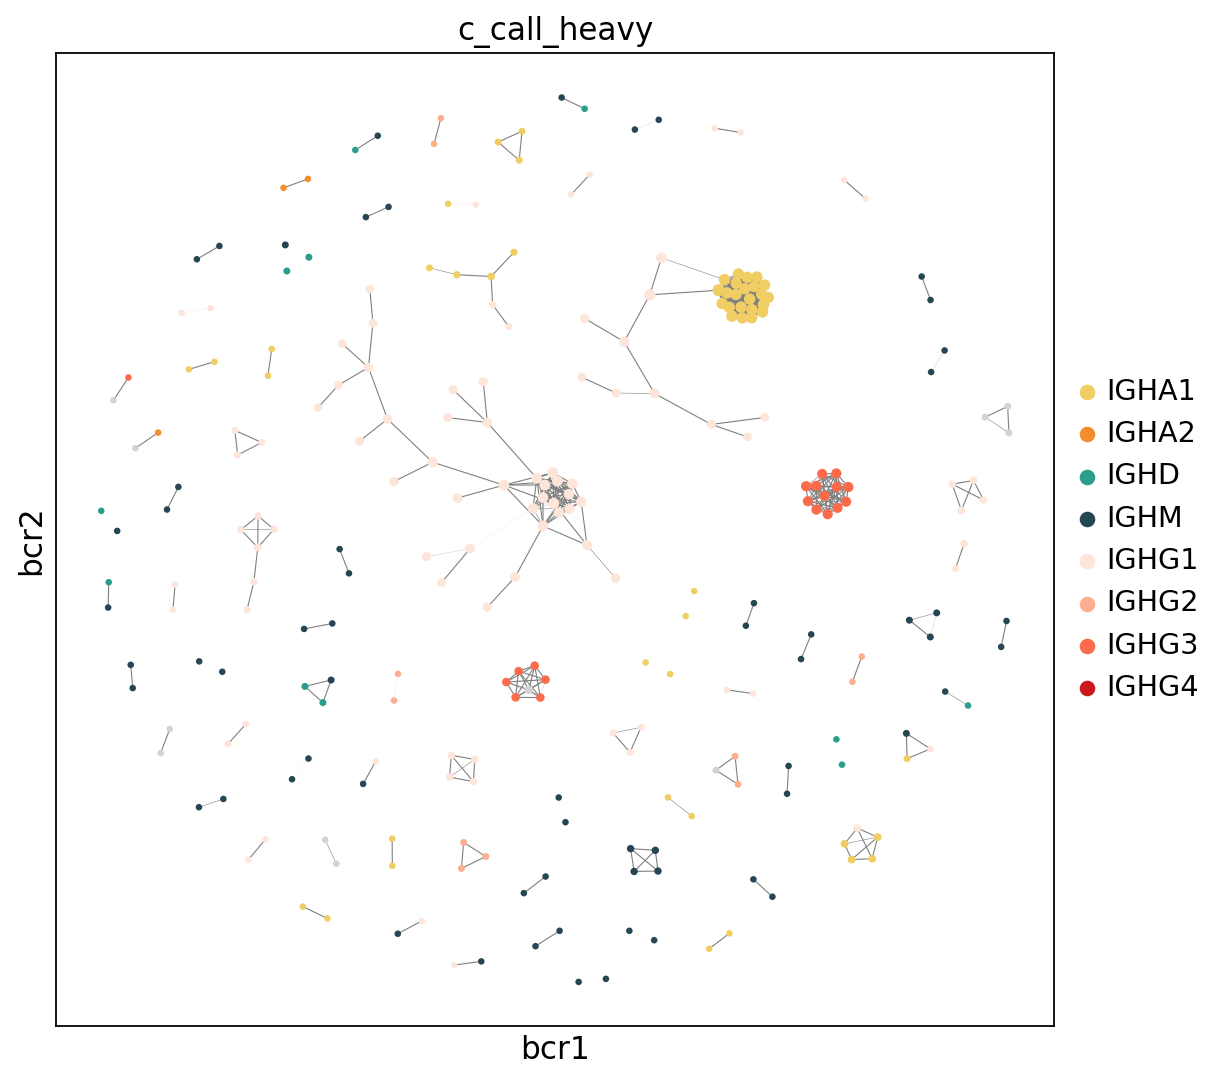

In [108]:
import numpy as np
sc.set_figure_params(figsize = [8,8], dpi_save = 900, vector_friendly = True)
ddl.pl.clone_network(adata['Critical'], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHM', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4'],
                     palette = [col_dict[c] for c in adata['Critical'].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Critical'])],
                     size = adata['Critical'].obs['clone_centrality']*20000+30,
                     save = '/expanded_critical_network_subclass.pdf')

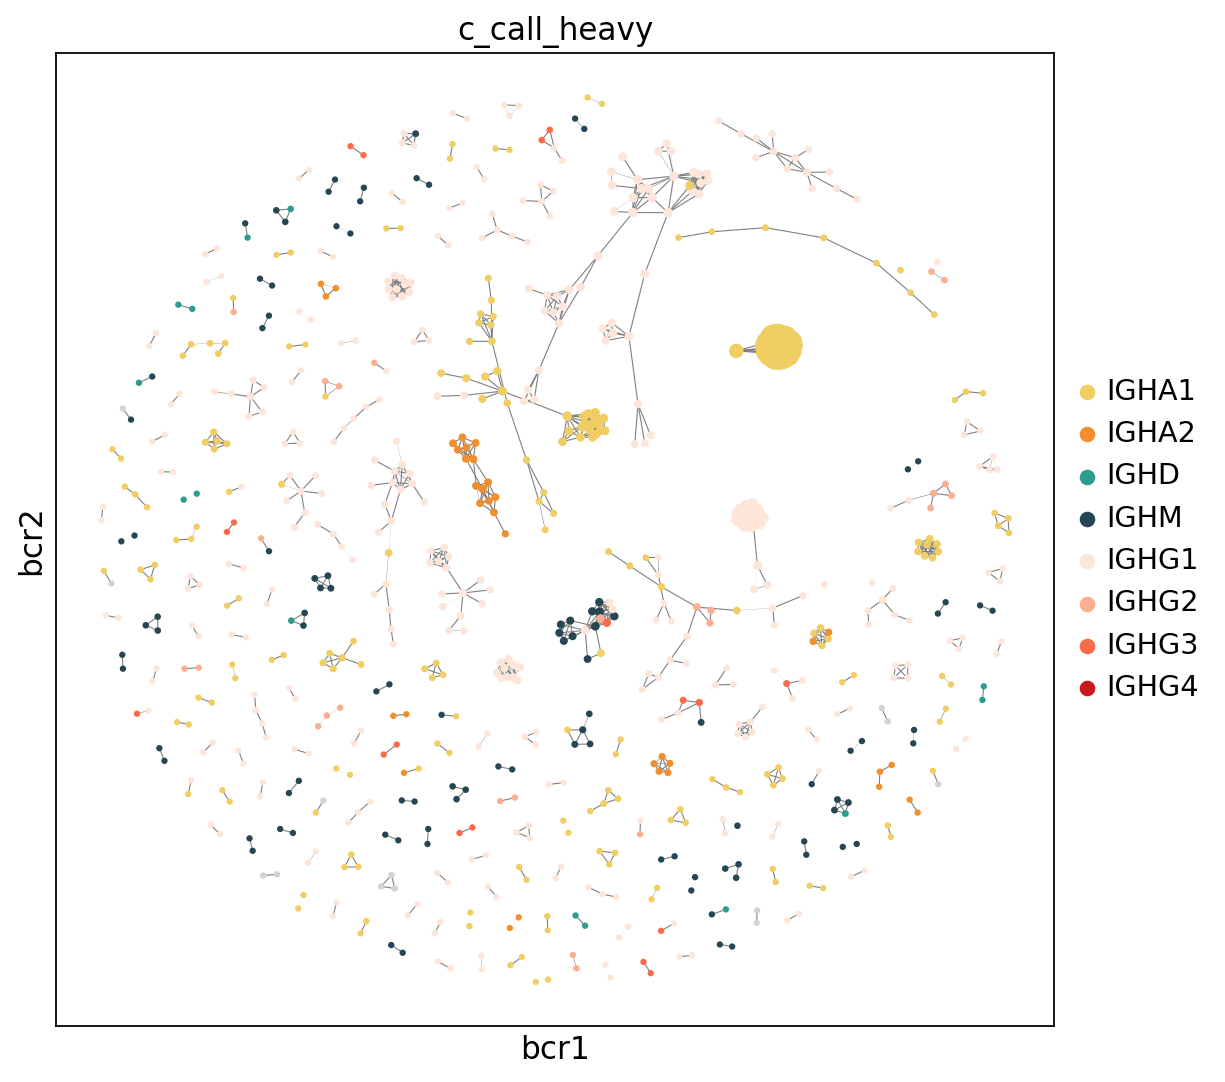

In [109]:
ddl.pl.clone_network(adata['Severe'], 
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHM', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4'],
                     palette = [col_dict[c] for c in adata['Severe'].obs['c_call_heavy'].cat.categories],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Severe'])],
                     size = adata['Severe'].obs['clone_centrality']*20000+30,
                     save = '/expanded_severe_network_subclass.pdf')

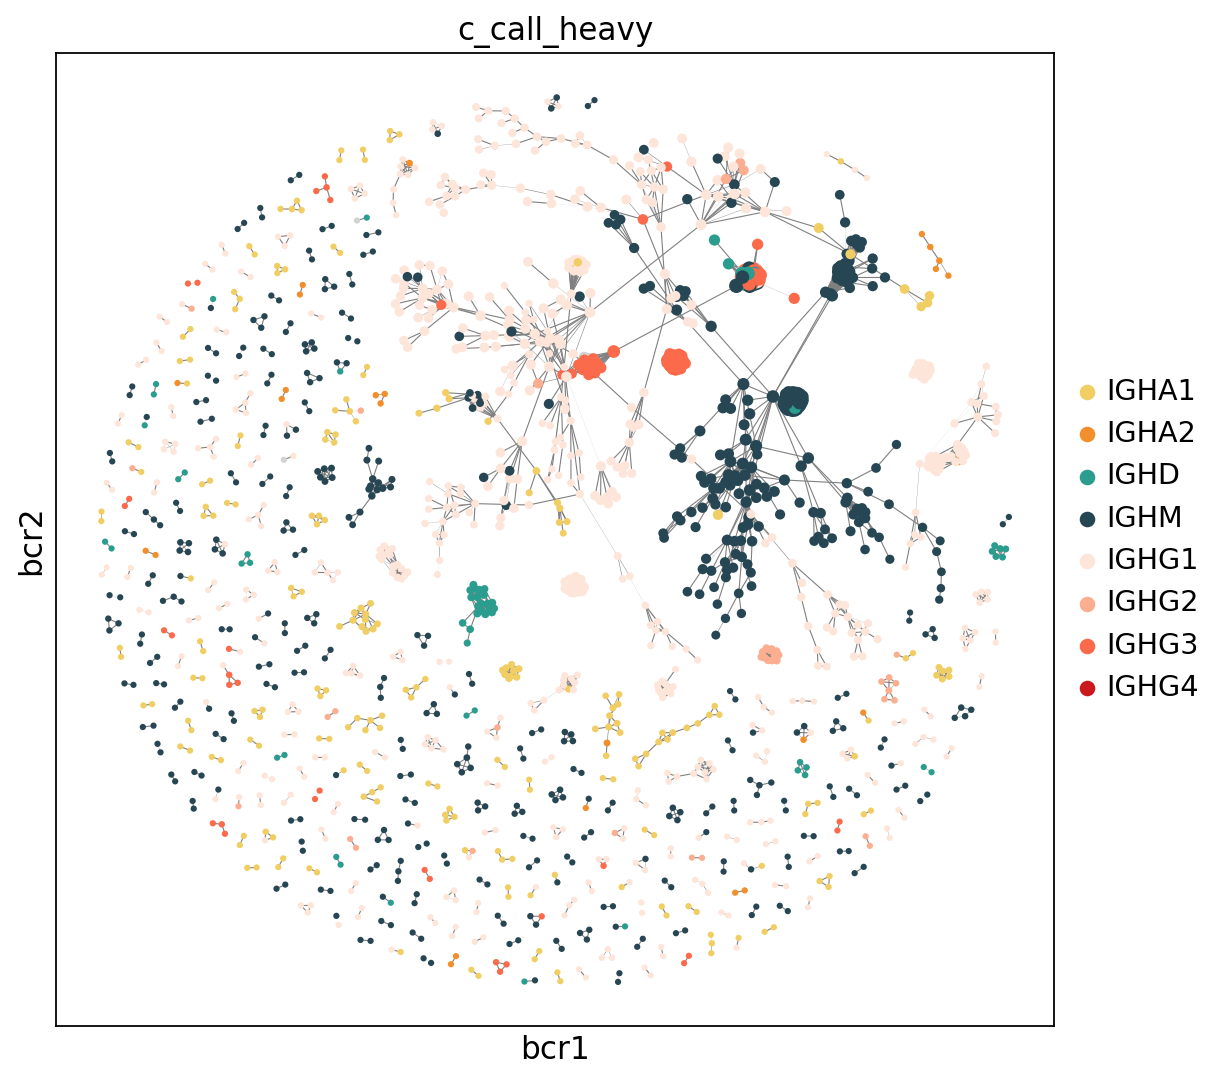

In [110]:
ddl.pl.clone_network(adata['Moderate'],
                     color = ['c_call_heavy'],
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHM', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4'],
                     palette = [col_dict[c] for c in adata['Moderate'].obs['c_call_heavy'].cat.categories],                     
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Moderate'])],
                     size = adata['Moderate'].obs['clone_centrality']*20000+30,
                     save = '/expanded_moderate_network_subclass.pdf')

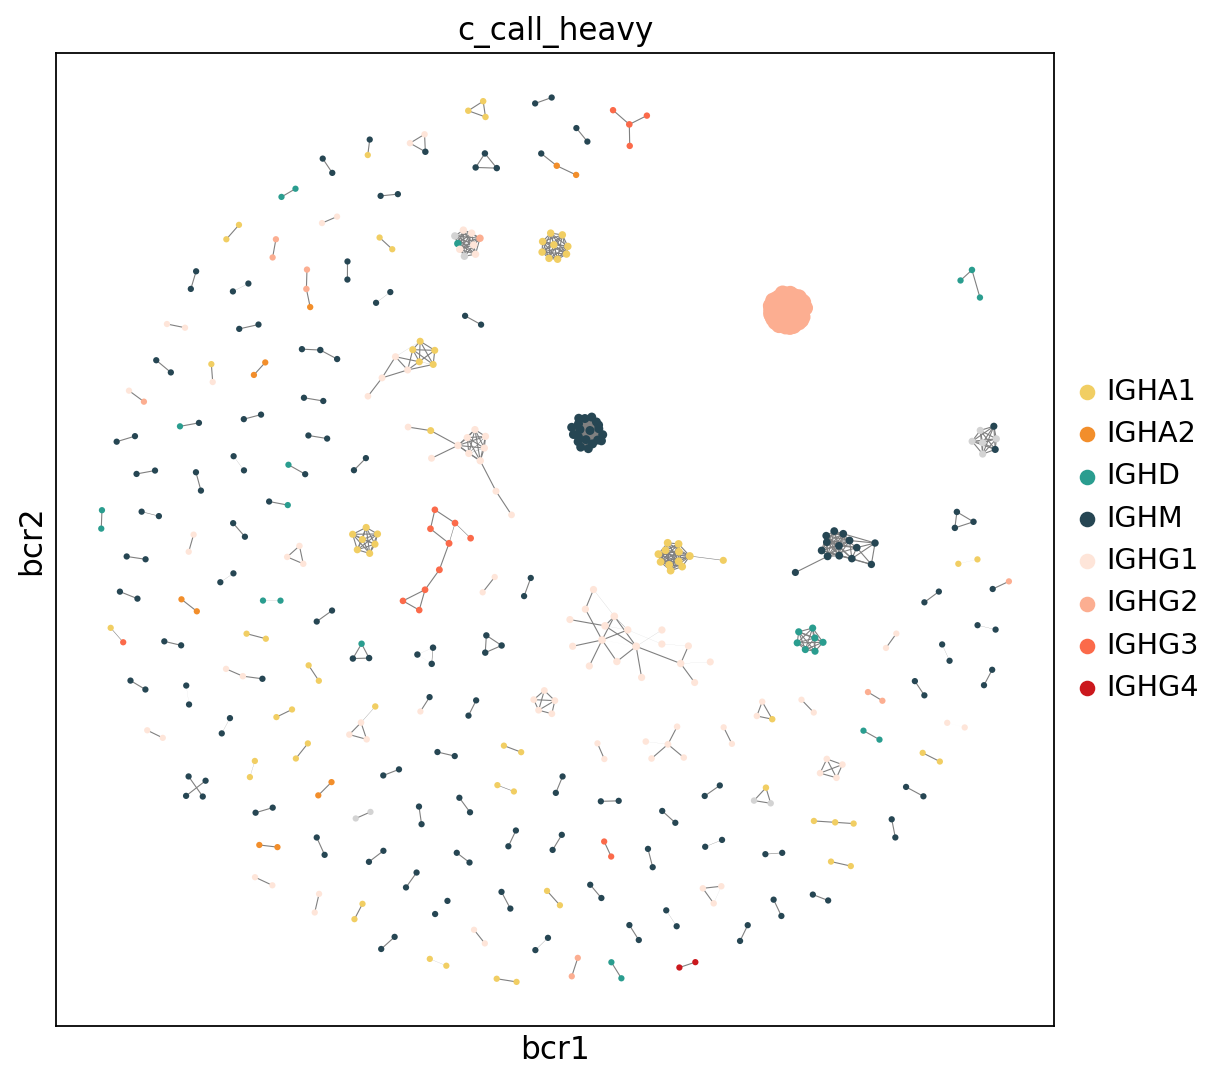

In [111]:
ddl.pl.clone_network(adata['Mild'],
                     color = ['c_call_heavy'],                      
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHM', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4'],
                     palette = [col_dict[c] for c in adata['Mild'].obs['c_call_heavy'].cat.categories],                     
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Mild'])],
                     size = adata['Mild'].obs['clone_centrality']*20000+30,
                     save = '/expanded_mild_network_subclass.pdf')

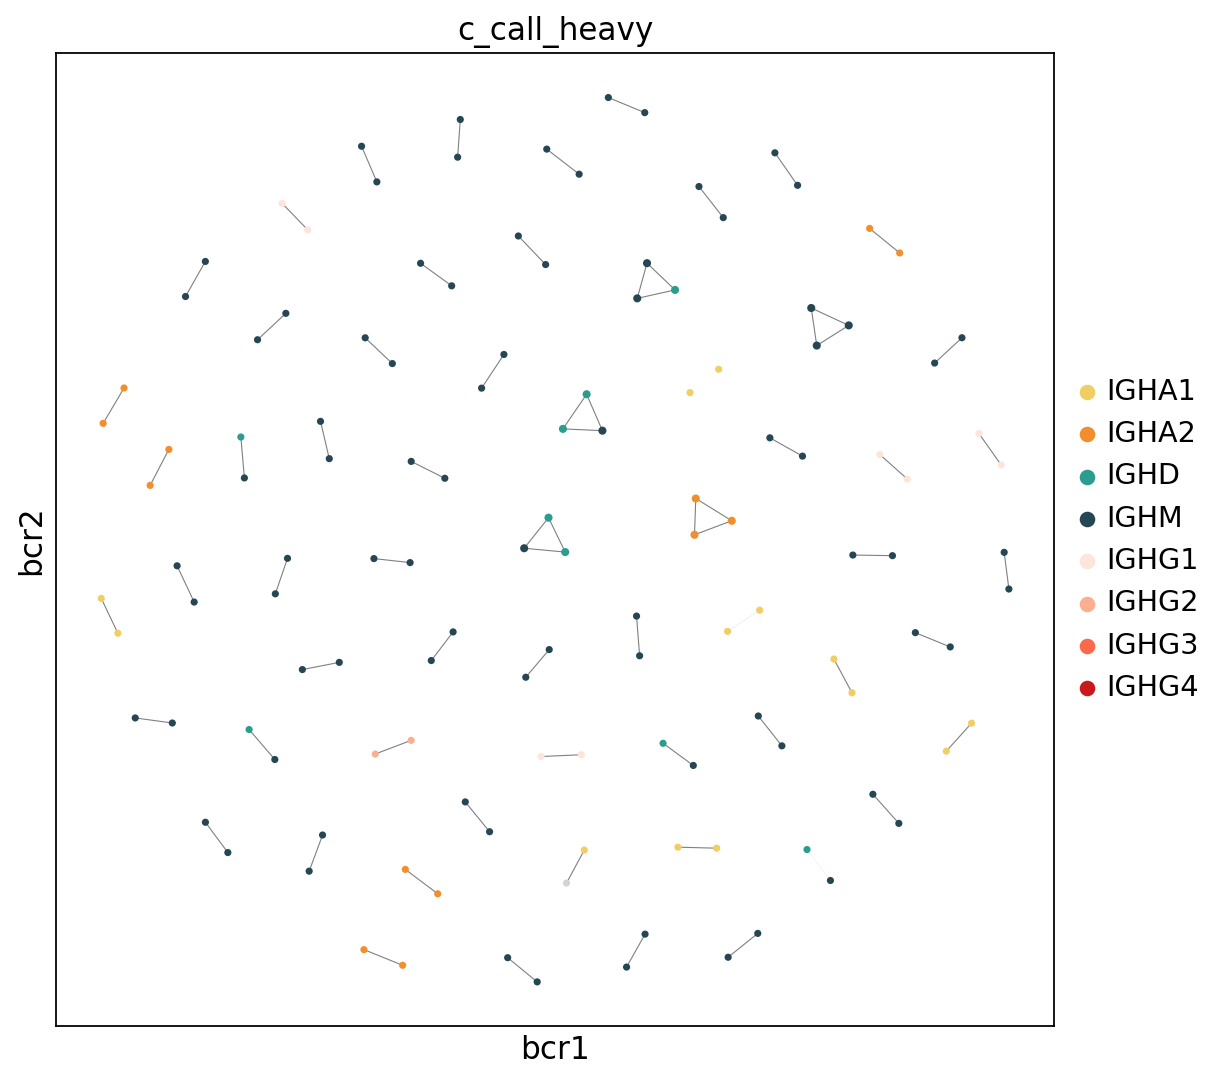

In [112]:
ddl.pl.clone_network(adata['Asymptomatic'],
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHM', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4'],
                     palette = [col_dict[c] for c in adata['Asymptomatic'].obs['c_call_heavy'].cat.categories],                     
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Asymptomatic'])],
                     size = adata['Asymptomatic'].obs['clone_centrality']*20000+30,
                     save = '/expanded_Asymptomatic_network_subclass.pdf')

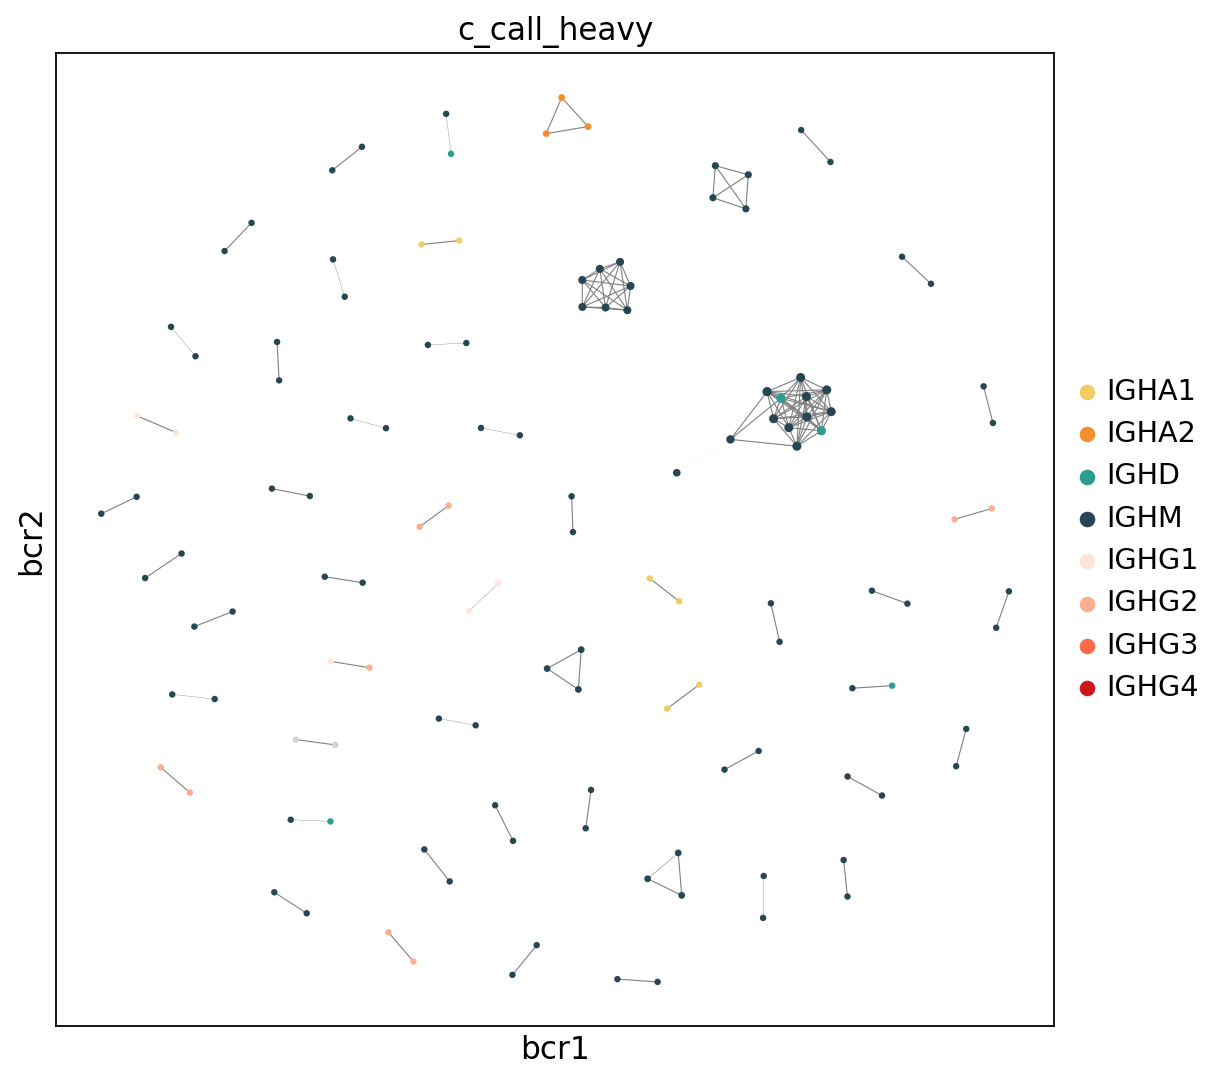

In [113]:
ddl.pl.clone_network(adata['Healthy'],
                     color = ['c_call_heavy'], 
                     groups = ['IGHA1', 'IGHA2', 'IGHD', 'IGHM', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4'],
                     palette = [col_dict[c] for c in adata['Healthy'].obs['c_call_heavy'].cat.categories],                     
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Healthy'])],
                     size = adata['Healthy'].obs['clone_centrality']*20000+30,
                     save = '/expanded_healthy_network_subclass.pdf')

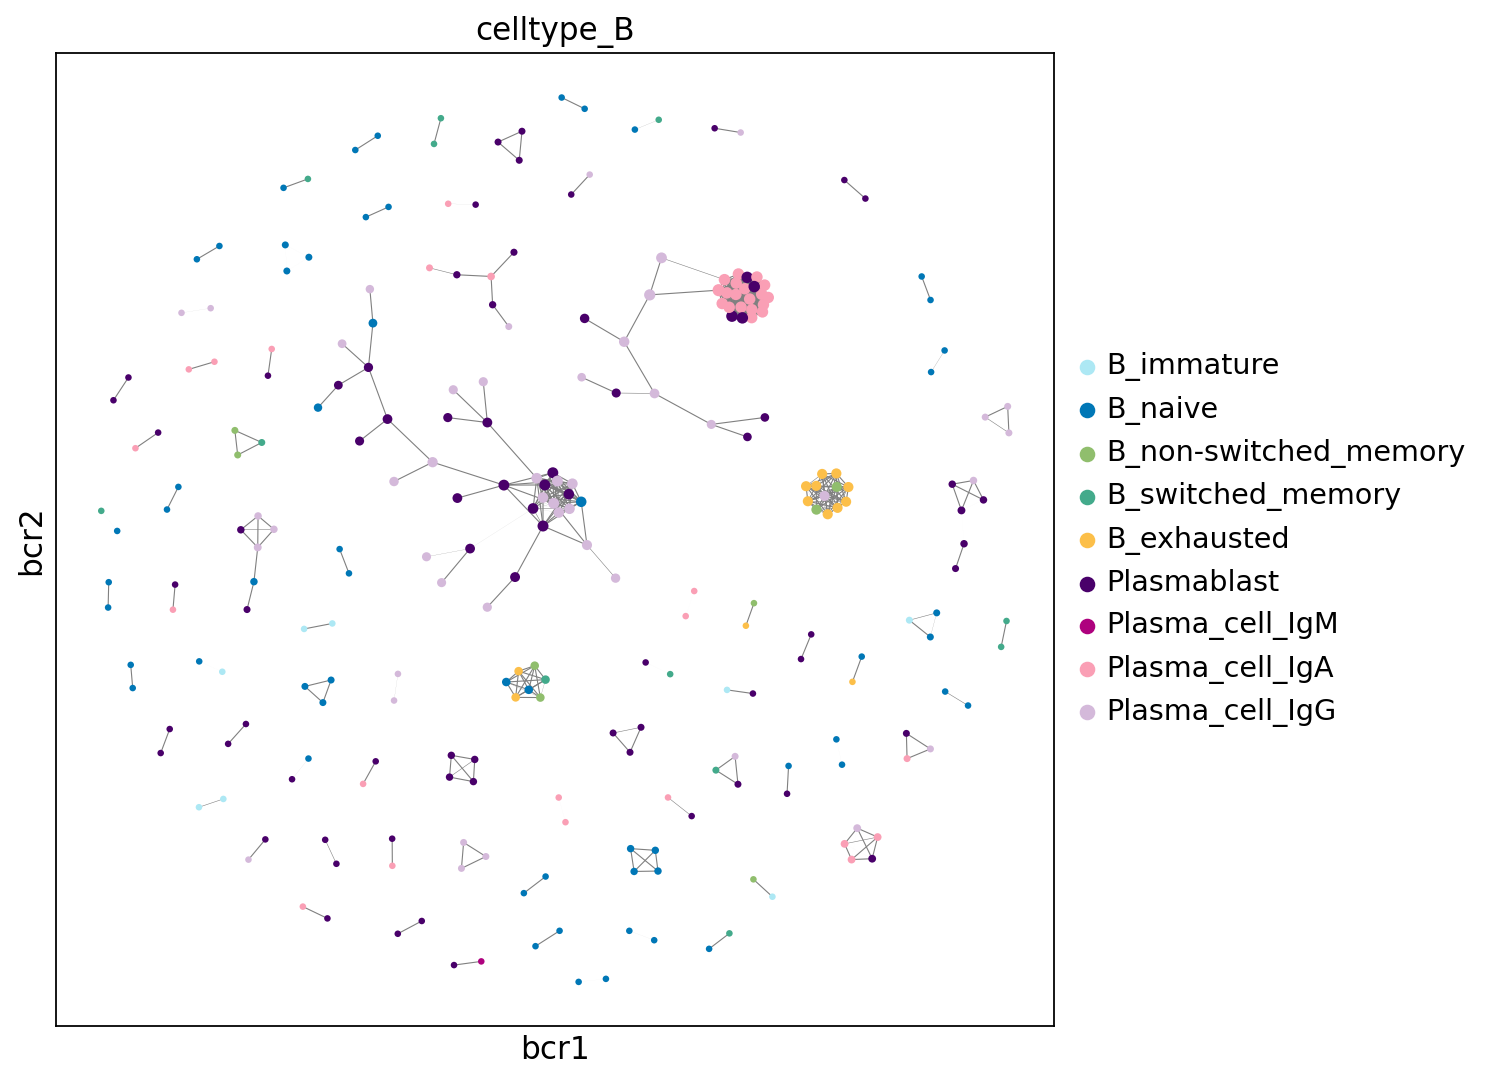

In [114]:
import numpy as np
ddl.pl.clone_network(adata['Critical'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Critical'])],
                     size = adata['Critical'].obs['clone_centrality']*20000+30,
                     save = '/expanded_critical_network_celltype.pdf')

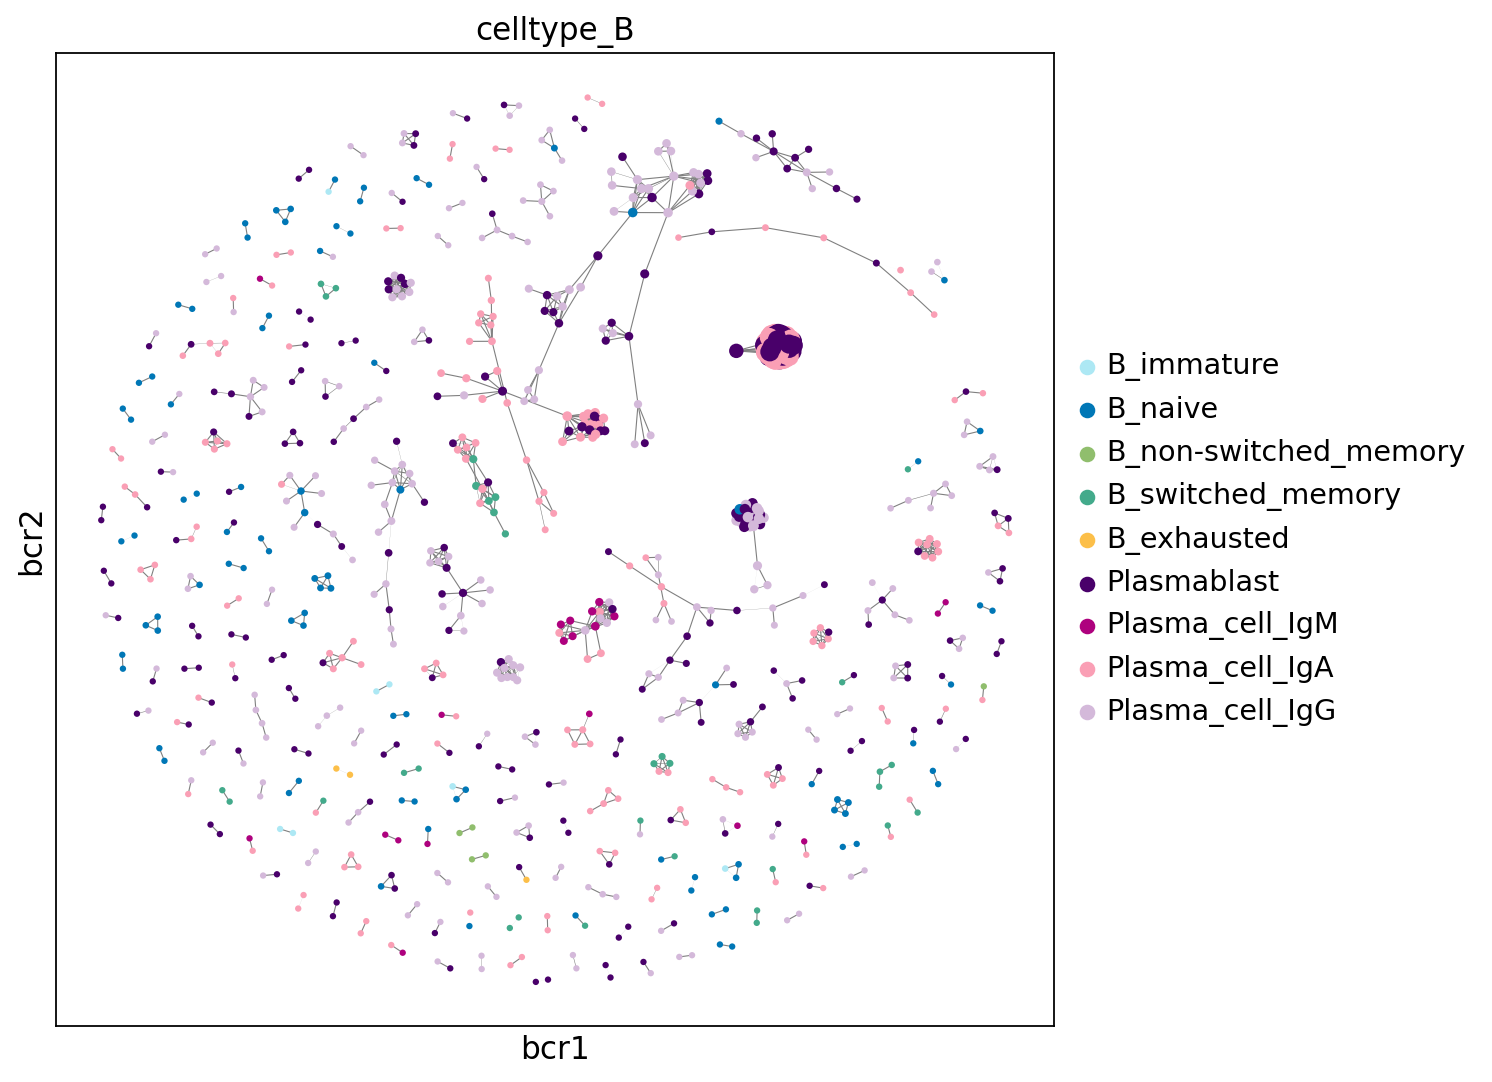

In [115]:
ddl.pl.clone_network(adata['Severe'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Severe'])],
                     size = adata['Severe'].obs['clone_centrality']*20000+30,
                     save = '/expanded_severe_network_celltype.pdf')

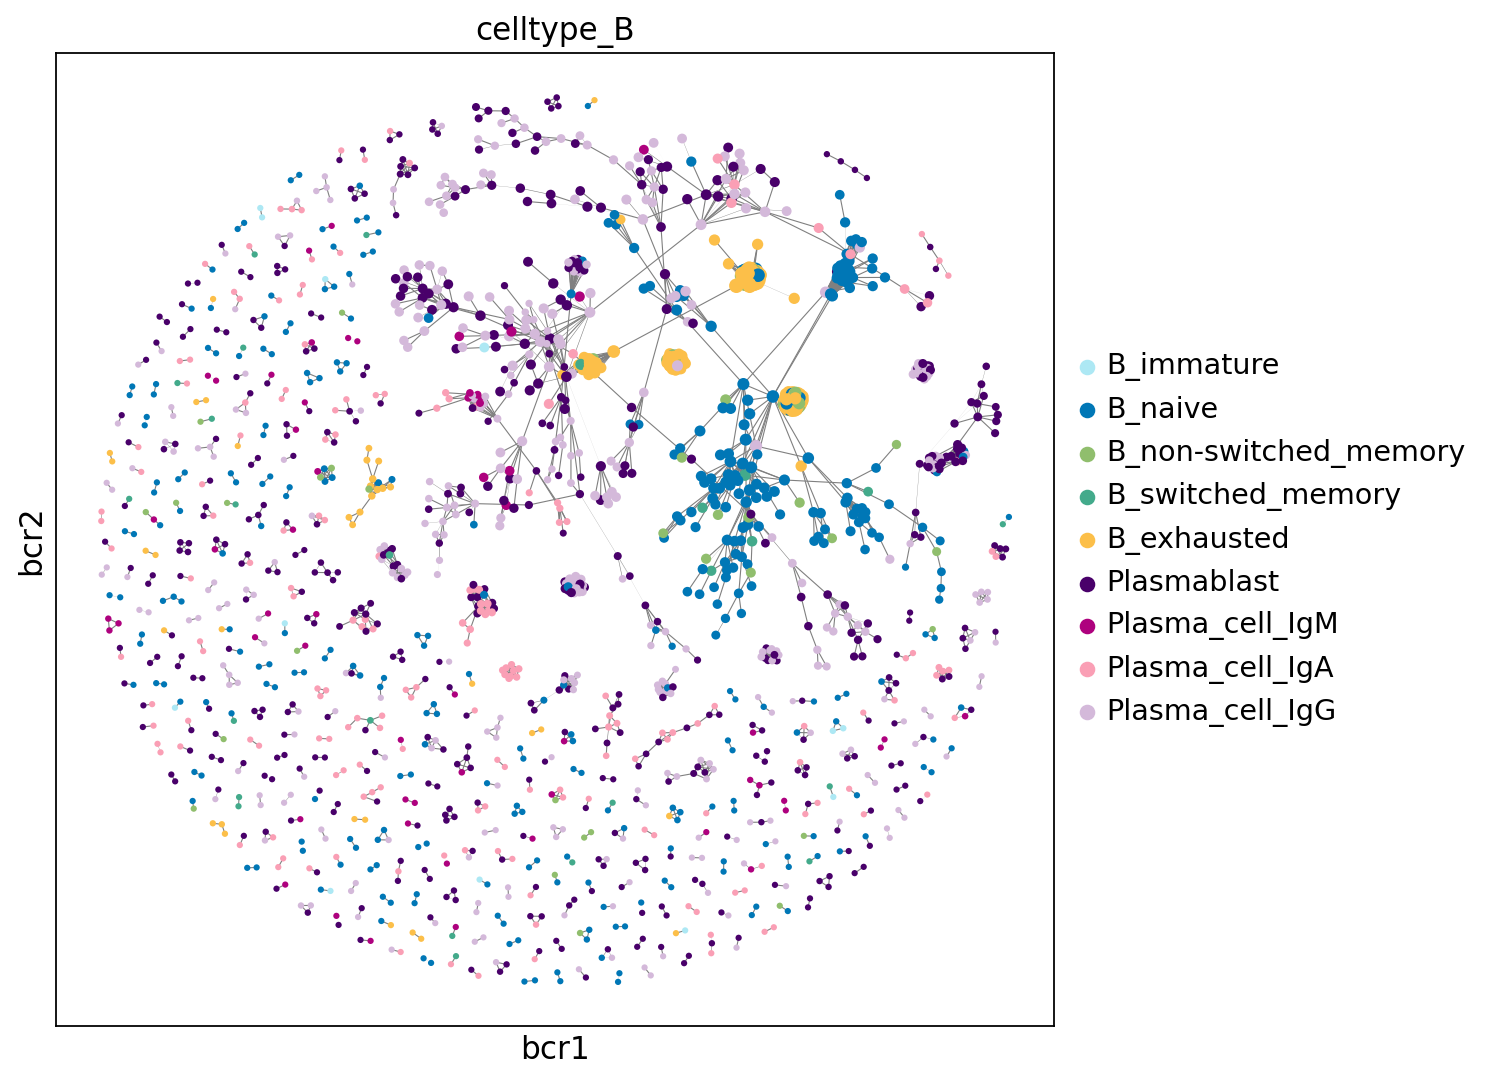

In [116]:
ddl.pl.clone_network(adata['Moderate'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Moderate'])],
                     size = adata['Moderate'].obs['clone_centrality']*20000+30,
                     save = '/expanded_moderate_network_celltype.pdf')

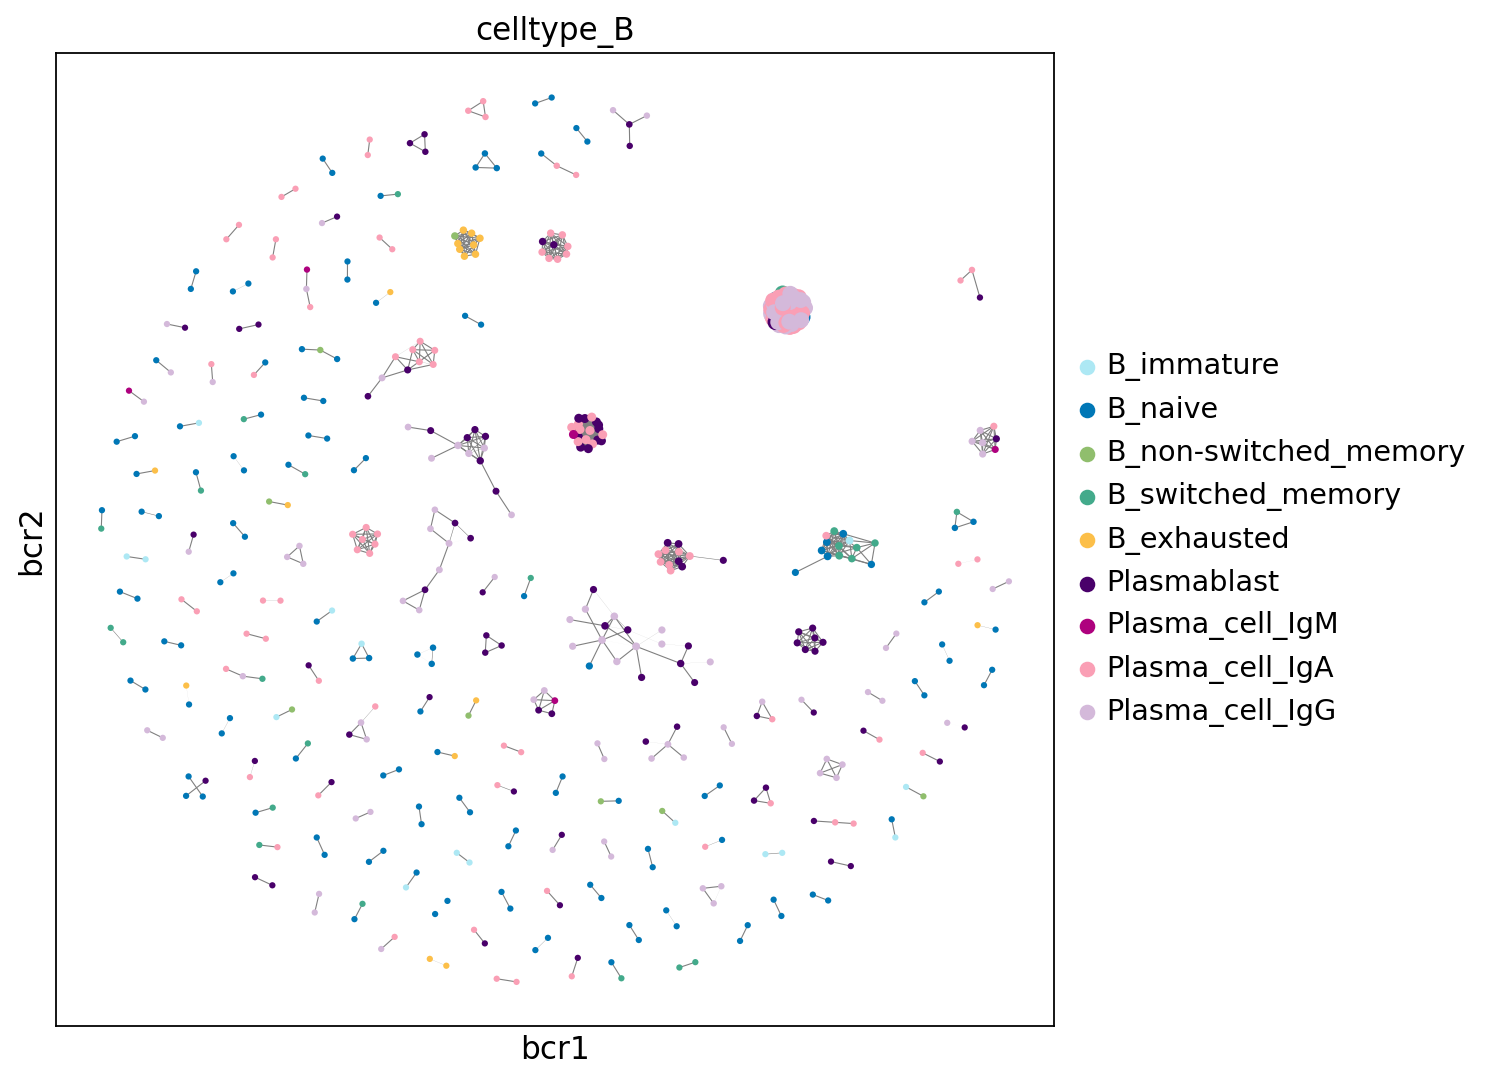

In [117]:
ddl.pl.clone_network(adata['Mild'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Mild'])],
                     size = adata['Mild'].obs['clone_centrality']*20000+30,
                     save = '/expanded_mild_network_celltype.pdf')

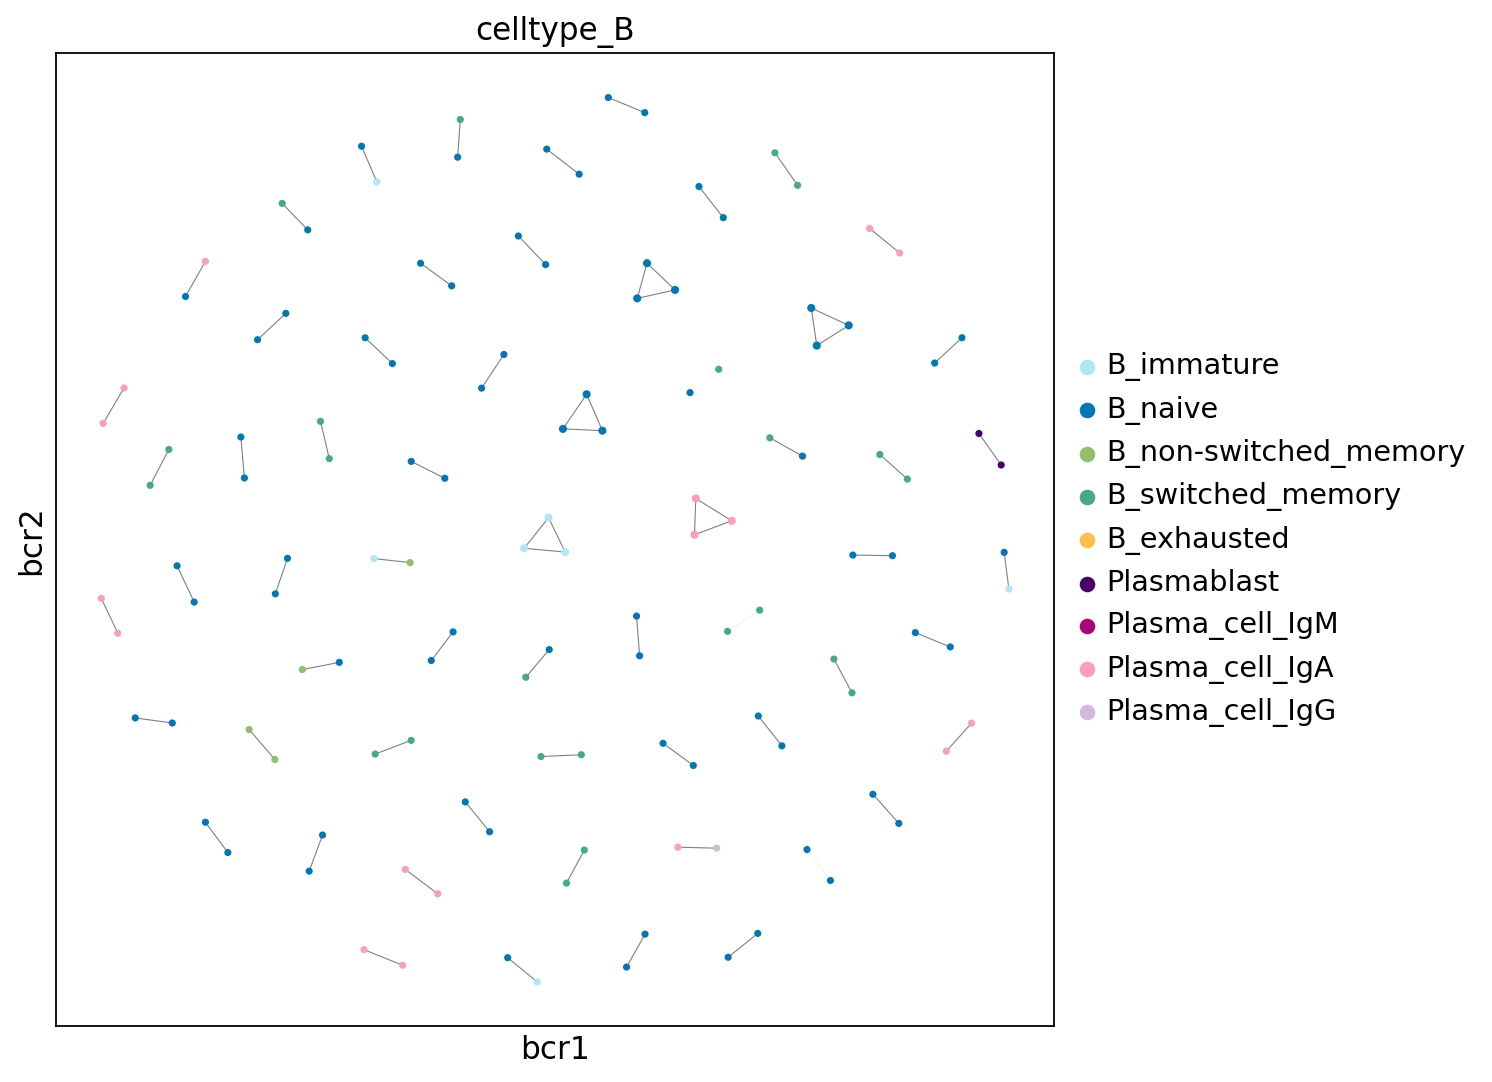

In [118]:
ddl.pl.clone_network(adata['Asymptomatic'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Asymptomatic'])],
                     size = adata['Asymptomatic'].obs['clone_centrality']*20000+30,
                     save = '/expanded_asymptomatic_network_celltype.pdf')

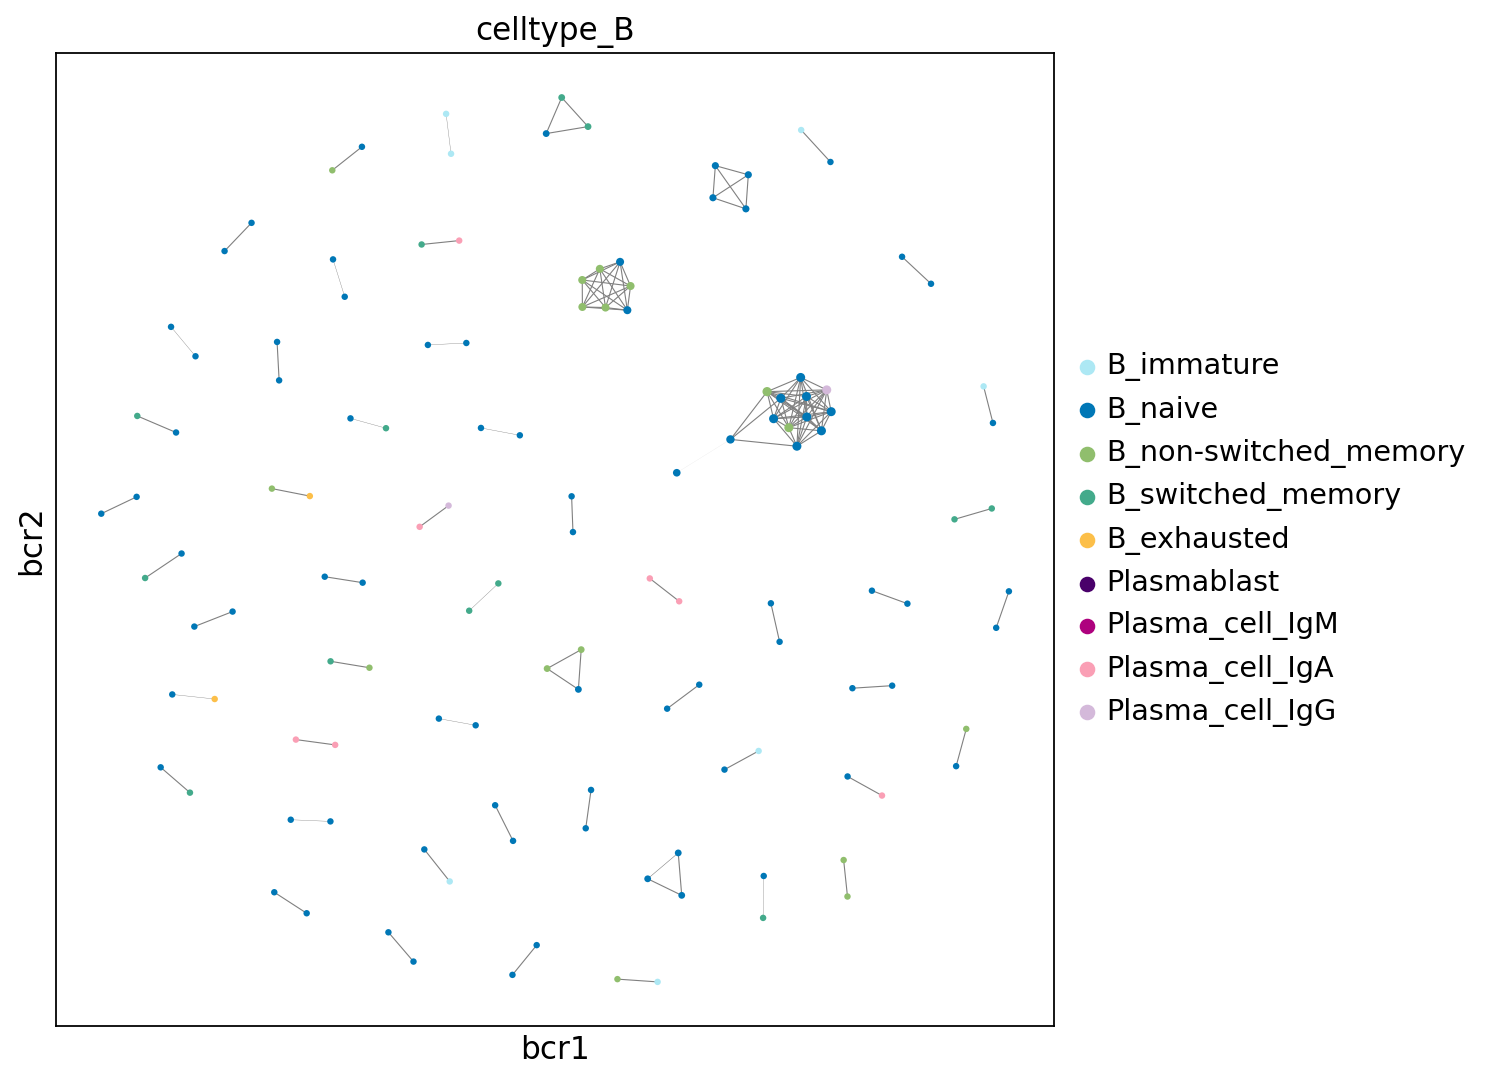

In [119]:
ddl.pl.clone_network(adata['Healthy'], 
                     color = ['celltype_B'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Healthy'])],
                     size = adata['Healthy'].obs['clone_centrality']*20000+30,
                     save = '/expanded_healthy_network_celltype.pdf')